In [1]:
import os 
import sys

import healpy as hp
import matplotlib.pyplot as plt
import numpy as np

import toast

In [2]:
import scipy.signal as si

In [3]:
import pysm3
import pysm3.units as usm

In [4]:
import skytools

In [5]:
import astropy.units as u 
import astropy as astro

In [6]:
from pixell import enmap, enplot, reproject, utils, curvedsky 
from scipy.optimize import curve_fit
from scipy.linalg import sqrtm

In [7]:
import astropy.wcs.wcs as wcs

In [8]:
from astropy.io import fits

In [9]:
NSIDE =512

In [10]:
def eshow(x,**kwargs): 
    ''' Define a function to help us plot the maps neatly '''
    plots = enplot.get_plots(x, **kwargs)
    enplot.show(plots, method = "ipython")

### Open files

In [11]:
rGC = hp.rotator.Rotator(coord=['G','C'])  # Transforms galactic to equatorial coordinates
rCG = hp.rotator.Rotator(coord=['C','G'])  # Transforms equatorial to galactic coordinates


In [12]:
keys = {"downgrade": 8, "ticks": 10, "colorbar": True}  
keys_d56 = {"downgrade": 2, "ticks": 5, "colorbar": True}  

# Astropy WCS

In [13]:
wcs_lon_npix = 2580
wcs_lat_npix = 2580
wcs_cpix_lon,wcs_cpix_lat = [2580//2,2580//2]
wcs_pixel_sz = 0.03333
clon = 30
clat = -56.

In [14]:
shape = (3,wcs_lon_npix,wcs_lat_npix)

In [15]:
mywcs = wcs.WCS(naxis=2)

In [16]:
mywcs.pixel_shape = (wcs_lon_npix, wcs_lat_npix)
mywcs.wcs.crpix = [wcs_cpix_lon, wcs_cpix_lat]
mywcs.wcs.cdelt = [-wcs_pixel_sz, wcs_pixel_sz]
mywcs.wcs.crval = [clat,clon]
mywcs.wcs.ctype = ["GLON-CAR", "GLAT-CAR"]

In [17]:
mywcs

car:{cdelt:[-0.03333,0.03333],crval:[-56,30],crpix:[1290.00,1290.00]}

In [18]:
healpixmap = hp.read_map(filename='cmb_030_GC_nside.FITS',field=None)

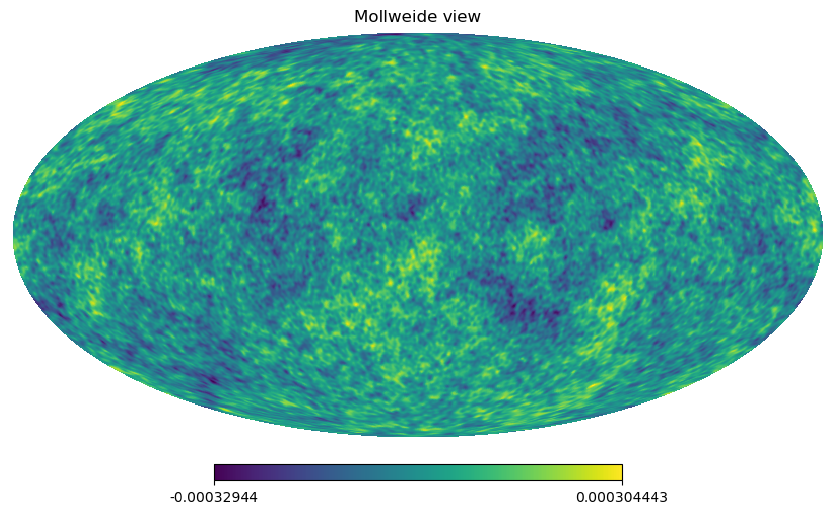

In [19]:
hp.mollview(healpixmap[0])

In [20]:
print(healpixmap.shape)
print(type(healpixmap))

(3, 3145728)
<class 'numpy.ndarray'>


In [21]:
planck_map_car = reproject.healpix2map(healpixmap, shape=shape, wcs=mywcs,
                                   lmax=1024,rot = None)
#enmap.write_map(fname='cmb_030_GC_nside_I_car.FITS',emap=planck_map_car)

In [22]:
type(planck_map_car)

pixell.enmap.ndmap

In [23]:
planck_map_car.shape

(3, 2580, 2580)

In [24]:
planck_map_car[0]

ndmap([[ 6.63259072e-05  6.48241556e-05  6.32485542e-05 ...  1.63455369e-04
   1.65734344e-04  1.68089492e-04]
 [ 6.73403291e-05  6.59426756e-05  6.44647412e-05 ...  1.61710004e-04
   1.63906776e-04  1.66181454e-04]
 [ 6.83656553e-05  6.70767930e-05  6.57011770e-05 ...  1.59962186e-04
   1.62079654e-04  1.64276631e-04]
 ...
 [ 4.44807719e-05  4.47751614e-05  4.52128596e-05 ... -2.71637885e-05
  -2.58539570e-05 -2.45297190e-05]
 [ 4.59821840e-05  4.62453892e-05  4.66502811e-05 ... -2.65217461e-05
  -2.52169236e-05 -2.38958366e-05]
 [ 4.75508954e-05  4.77889644e-05  4.81662918e-05 ... -2.58881894e-05
  -2.45989404e-05 -2.32915358e-05]],car:{cdelt:[-0.03333,0.03333],crval:[-56,30],crpix:[1290.00,1290.00]})

In [25]:
mywcs

car:{cdelt:[-0.03333,0.03333],crval:[-56,30],crpix:[1290.00,1290.00]}

In [26]:
1890.62*.03333

63.01436459999999

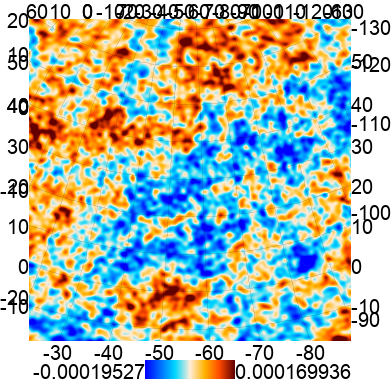

In [27]:
eshow(planck_map_car[0],**keys)

In [28]:
enmap.write_map(fname='cmb_030_GC_nside_I_car.FITS',emap=planck_map_car[0])

## Map with galactic foregrounds

In [29]:
sky_test = pysm3.Sky(nside=NSIDE,preset_strings=["d0","s0"])

In [30]:
map_test_GC = hp.read_map(filename='d0s0_GC_30GHz.FITS',field=None)

In [31]:
map_test = hp.read_map(filename='d0s0_30GHz.FITS',field=None)

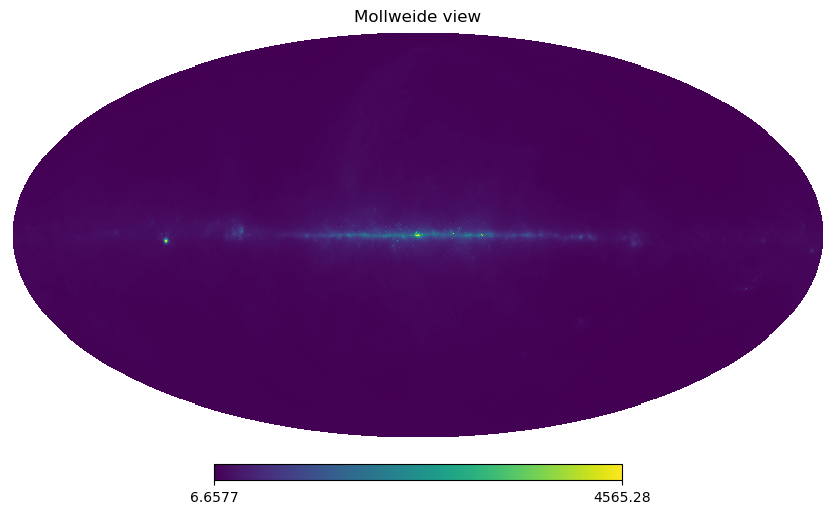

In [32]:
hp.mollview(map_test[0])

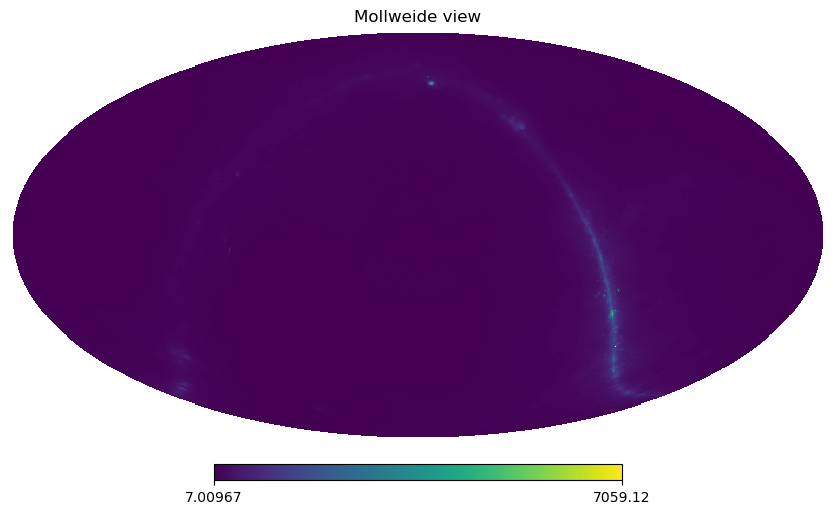

In [33]:
hp.mollview(map_test_GC[0])

In [34]:
sky_car= reproject.healpix2map(map_test, shape=shape, wcs=mywcs,
                                   lmax=1024,rot = None)

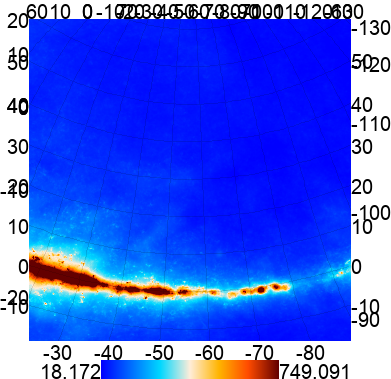

In [35]:
eshow(sky_car[0],**keys)

In [36]:
sky_car2 = reproject.healpix2map(map_test_GC, shape=shape, wcs=mywcs,
                                   lmax=1024,rot = "cel,gal")

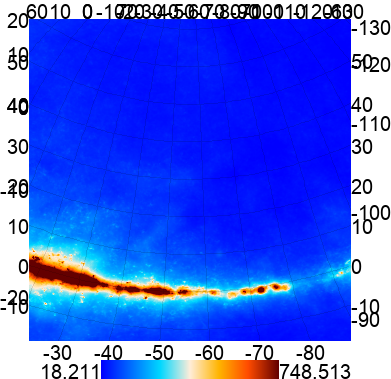

In [37]:
eshow(sky_car2[0],**keys)

In [38]:
sky_car3= reproject.healpix2map(map_test, shape=shape, wcs=mywcs,
                                   lmax=1024,rot = "gal,cel")

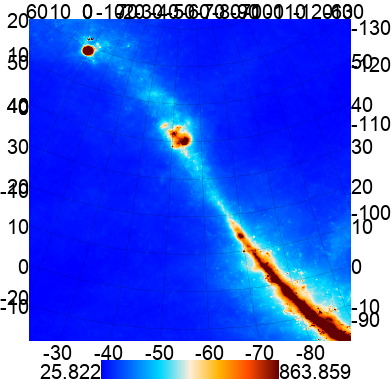

In [39]:
eshow(sky_car3[0],**keys)

In [40]:
planck_map_car.shape

(3, 2580, 2580)

In [41]:
hitmap = enmap.zeros(planck_map_car.shape,planck_map_car.wcs)

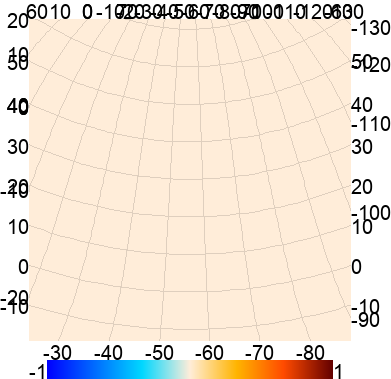

In [42]:
eshow(hitmap[0],**keys)

In [43]:
hitmap1 = hitmap[0]

In [44]:
hitmap1.shape[1]

2580

In [45]:
for i in range(2580//2,2580):
    hitmap1[1290,i]=100

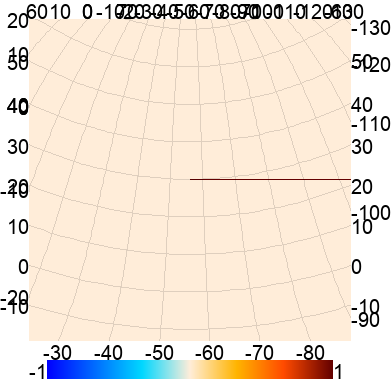

In [46]:
eshow(hitmap1,**keys)